### **Home Loan EDA**

In [130]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


#### **Phase 1**

##### *Task 1.1*

In [197]:
# Loading the dataset
train_df = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

df = pd.read_csv(train_df)
train_data = df.to_csv('train_data.csv', index=False)

In [132]:
# Lets check to confirm if the data has been loaded 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [133]:
# Creating a copy so the original data won't be tampered with
data = df.copy()

In [134]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### *Task 1.2* Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [135]:
# Firstly lets check for the shape of the data
print(f"The shape of the data is {data.shape}")
print("="*50)

# Inspecting and checking the data for missing values
print(f"Missing values in the dataset are: \n{data.isna().sum()}")
print("="*50)

# Checking for duplicates in the dataset
print(f"Number of duplicates in the data {data.duplicated().sum()}")
print("="*50)

The shape of the data is (614, 13)
Missing values in the dataset are: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Number of duplicates in the data 0


The missing values in the dataset are Gender, Marital status, Dependants, self employed, Loan amount,  Loan amount term and credit history with no duplicates in the data

In [136]:

# Lets check the data type
print(f"The Column data types: \n{data.dtypes}")
print("="*50)

The Column data types: 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


It is observed from the data types that the dependant column is an object data type instead of a int because of the + sign added to indicate some applicants have more than 3 dependants which is an important information that will affect their loan repayment so it is better left as it is.

In [137]:
# checking the statistical info of the data
print(data.info())
print("="*50)
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


##### *Task 1.3:* Clean the dataset by handling missing values, correcting data types, and addressing outliers.

In [ ]:
# Checking missing values again
print(f"Missing values in the dataset are: \n{data.isna().sum()}")

Missing values in the dataset are: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [139]:
# Lets take the missing values on eafter the other

# Gender
data["Gender"].value_counts()


Gender
Male      489
Female    112
Name: count, dtype: int64

There are just 13 missing values in the gender column and since the male has the highest count, lets fill it with male since it is pretty obvious male gender apply for loan thanthe female gender

In [140]:
# Fill the gender column with the mode
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)

# Check if it has been flled
print(data["Gender"].isna().sum())

0


C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2690392594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)


In [141]:
# Check the dependents column
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Most applicants have 0 dependents so filling with the mode is a good decision here since the number of missing values is less significant

In [142]:
# Fill the Dependent column with the mode
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)

# Check if it has been flled
print(data["Dependents"].isna().sum())

0


C:\Users\USER\AppData\Local\Temp\ipykernel_4208\3663923835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)


In [143]:
# Check the dependents column
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

it is obvious that top loan applicants are not self employed which means most people that apply for loan are salary earners and therefore have a stable source of income monthly, e can also fill this with the mode

In [144]:
# Fill the Self_Employed column with the mode
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)

# Check if it has been flled
print(data["Self_Employed"].isna().sum())

0


C:\Users\USER\AppData\Local\Temp\ipykernel_4208\3187903930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)


To fill the loan amount, the median will be implemented because the amount is continous and using the mean or mode can cause outliers if they are extremely high values in the amount.

In [145]:
# Fill the LoanAmount column with the mode
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)

# Check if it has been flled
print(data["LoanAmount"].isna().sum())

0


C:\Users\USER\AppData\Local\Temp\ipykernel_4208\3686330142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)


For the Loan Amount Term, the mode will best fit because the term is in months and duration which will be uniform and the credit history is either 1 for good or 0 for bad or missing according to the data dictionary so it will be filled with 0

In [146]:
check = data["Loan_Amount_Term"].value_counts()
print(check)
check = data["Credit_History"].value_counts()
print(check)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [147]:
# Filling the Loan Amount term with the mode
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace=True)

# Filling the credit History with 0
credit_history = data["Credit_History"].fillna(0, inplace=True)
# Check if it has been flled
print(data.isna().sum())

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_4208\3179080471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4208\3179080471.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [148]:
# Fill the Self_Employed column with the mode
data["Married"].fillna(data["Married"].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_4208\396009993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Married"].fillna(data["Married"].mode()[0], inplace=True)


In [149]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [150]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [151]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [152]:
# Handling Outliers

# Picking out numerical columns in the dataset
num_col = data.select_dtypes(include=['float64', 'int64']).columns
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

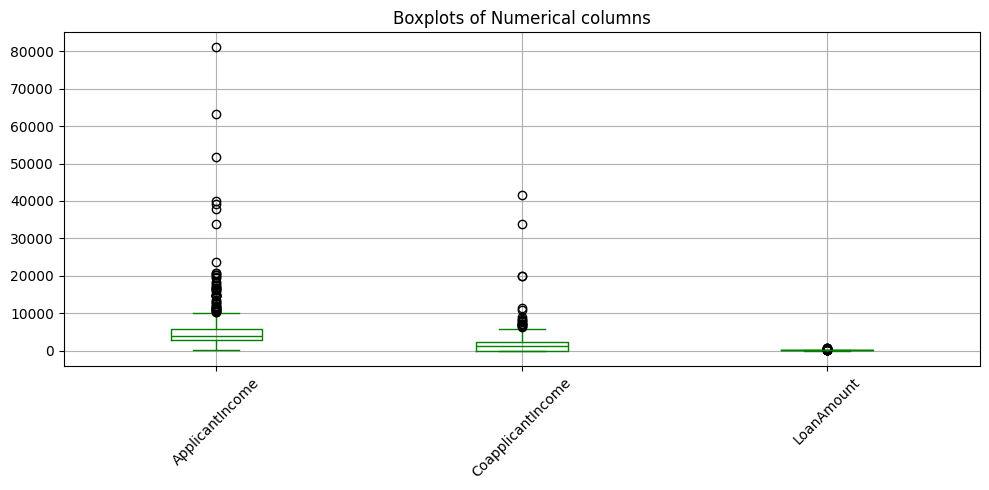

In [153]:
# Quick boxplot visualization for numeric columns
plt.figure(figsize=(10, 5))
data[num_col].boxplot(rot=45, color="green")
plt.title("Boxplots of Numerical columns")
plt.tight_layout()
plt.show()

In [154]:
# Checking the dataset for number of outliers using IQR method
outlier_cols = []
for i in num_col:
  print(f"Analyzing Numerical column {i}")
  print()
  # Calculate outlier bounds using IQR
  
  # Defining the quantiles
  Q1 = data[i].quantile(0.25)
  Q2 = data[i].quantile(0.50)
  Q3 = data[i].quantile(0.75)

  # Defining the boundaries
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Checking the outliers
  upper_outliers = (data [i] > upper_bound)
  lower_outliers = (data [i] < lower_bound) 

  # checking the number of outliers
  no_outliers = ((upper_outliers) | (lower_outliers)).sum()

  print(f"The number of outliers for {i} is {no_outliers}")


  # Showing a sample of the outliers
  if no_outliers > 0:
        outlier_cols.append(i)

Analyzing Numerical column ApplicantIncome

The number of outliers for ApplicantIncome is 50
Analyzing Numerical column CoapplicantIncome

The number of outliers for CoapplicantIncome is 18
Analyzing Numerical column LoanAmount

The number of outliers for LoanAmount is 41


In [155]:
# Handling the outliers using iqr
def handling_outlier(data, i):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), data[i].clip(lower=lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_cols:
    df_train = handling_outlier(data, i)

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### **Phase 2**

##### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [156]:
# Checking the categorical columns
cat_col = data.select_dtypes(include=['object']).columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [167]:
# Conducting the descriptive statistics on the numerical columns
data[num_col].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4617.091205,2479.806058,150.0,2877.50,3812.5,5795.00,10171.000
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,137.365635,55.779749,9.0,100.25,128.0,164.75,261.500


In [ ]:
# stat_features = pd.DataFrame({
#   "Mean": data[num_col].mean().round(2),
#   "Median": data[num_col].median().round(2),
#   "Mode": data[num_col].mode().round(2),
#   "Variance": data[num_col].var().round(2),
#   "Std Dev": data[num_col].std().round(2),
#   "Maximum": data[num_col].max().round(2),
#   "Minimum": data[num_col].min().round(2),
#   "Range": (np.subtract(data[num_col].max(), data[num_col].min())).round(2),
#   "25th %ile": data[num_col].quantile(0.25).round(2),
#   "50th %ile": data[num_col].quantile(0.50).round(2),
#   "75th %ile": data[num_col].quantile(0.75).round(2),
#   "IQR": (np.subtract(data[num_col].quantile(0.75), data[num_col].quantile(0.25))).round(2),
#   "Skewness": data[num_col].skew().round(2),
#   "Kurtosis": data[num_col].kurtosis().round(2)
# })

# stat_features.T

Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [182]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*30)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='red')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000

Skewness: 1.040
Kurtosis: 0.126


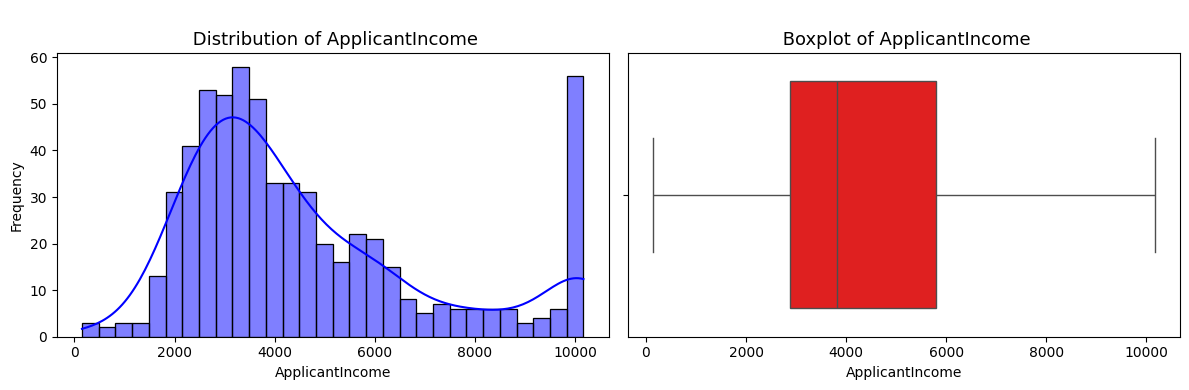


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


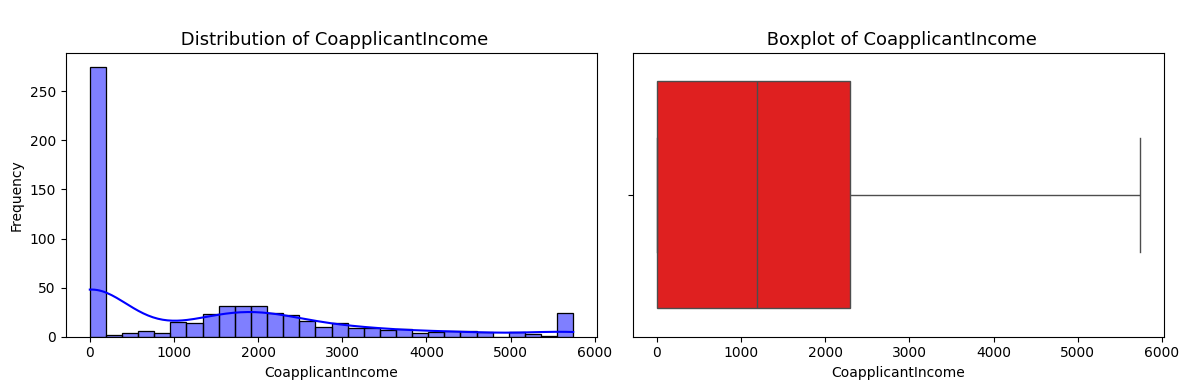


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000

Skewness: 0.684
Kurtosis: 0.112


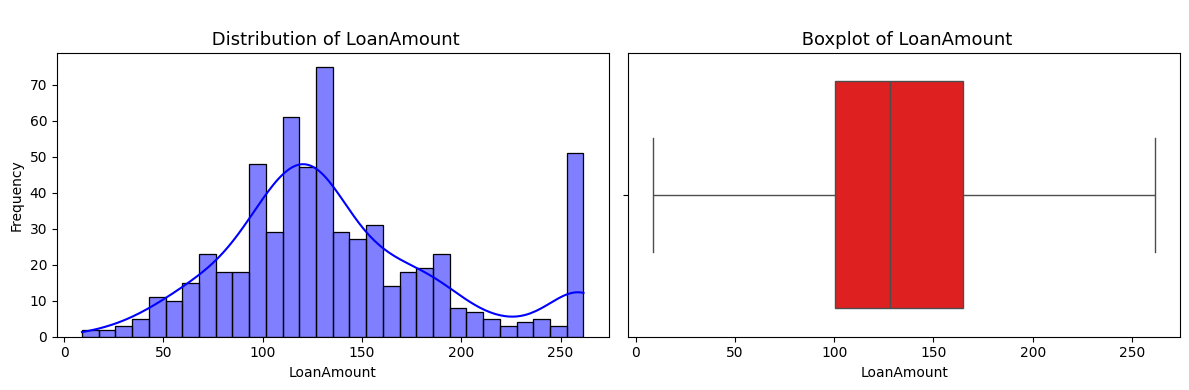

LoanAmount is moderately skewed.


In [183]:
for col in num_col:
  univariate_numerical_eda(data, col)

Distributions of Numerical Features
1. ApplicantIncome
Applicant income is Rightly skewed, as the skewness of the distribution indicates most applicants earn between low to moderate income (2000 - 6000) with few having high income. The mean is also higher than the median which confirms the right skew distribution

2. CoapplicantsIncome
coapplicant income is highly right skewed, the incomes of the coapplicant is very low and near zero indication many coapplicants have no income. Indications from the boxplot indicates there are extreme outliers which has been capped and handled when working on the outliers

3. LoanAmount
The loan amount is moderately skewed, that is it is skewed normally. Most loanf amount are between 100 to 200 with few outliers


Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [ ]:
# Selecting categorical column and cols to plot
cat_col
cat_plot = [c for c in cat_col if c != 'Loan_ID']

def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, bar chart and pie chart.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    # Pie chart
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution barchart of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Piechart
    plt.subplot(1,2,2)
    data[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution piechart of {column}", fontsize=12)

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


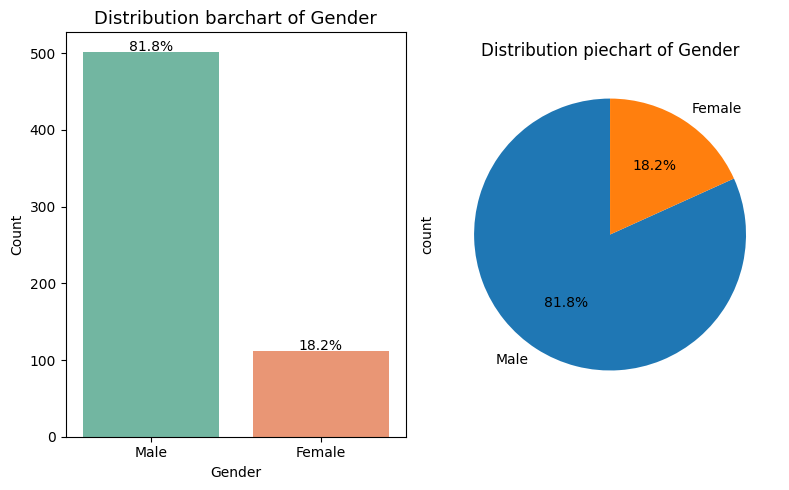

Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


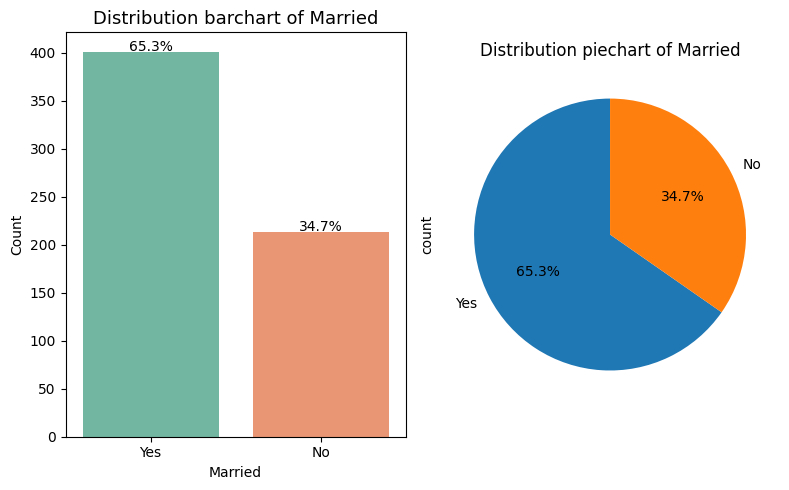

Feature: Dependents
            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


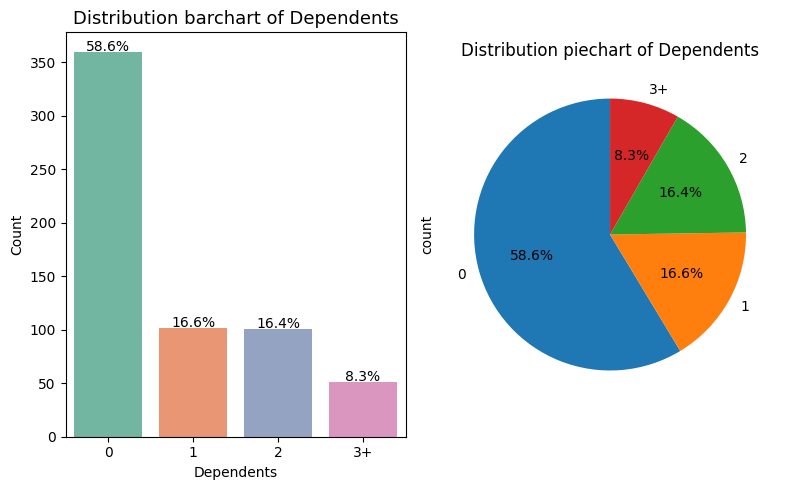

Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


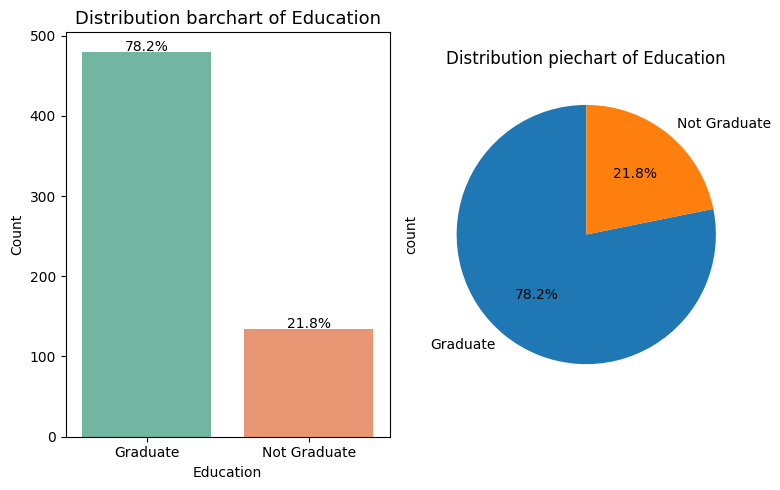

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


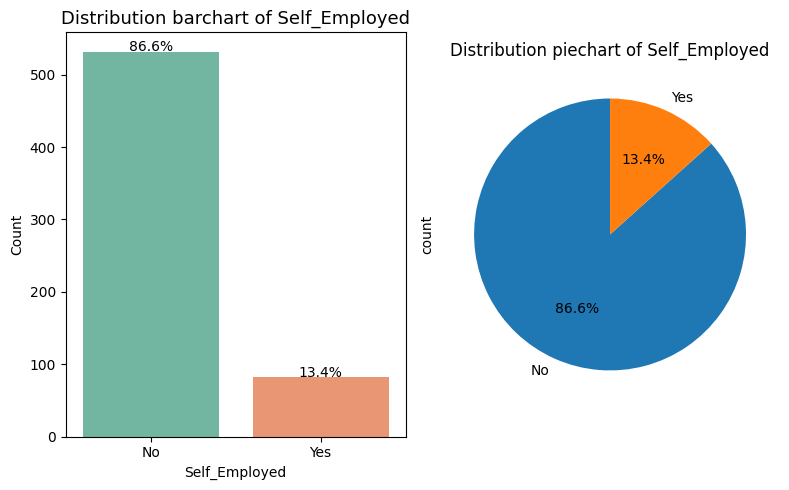

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


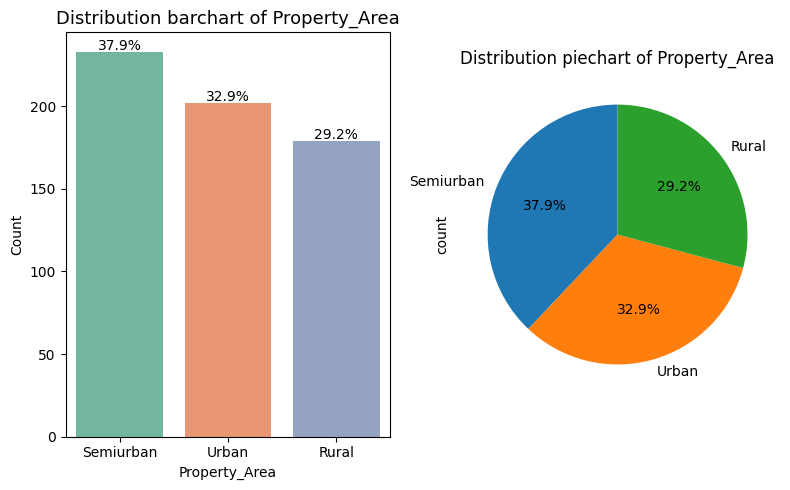

Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\USER\AppData\Local\Temp\ipykernel_4208\2329605077.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


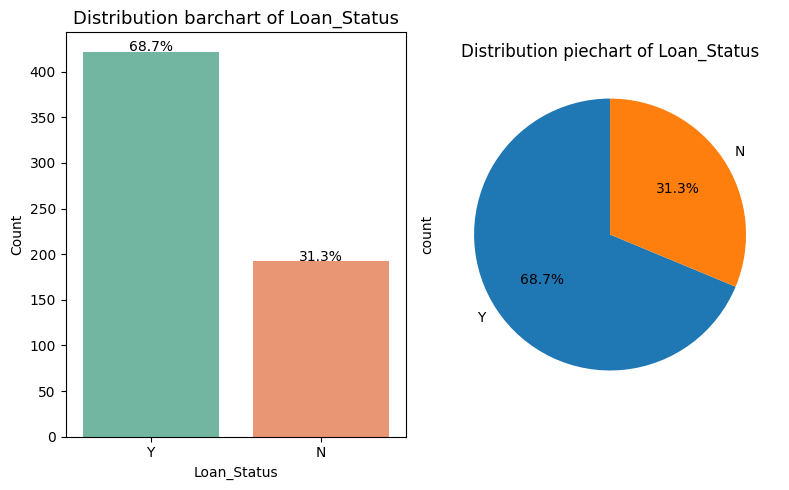

In [192]:
for col in cat_plot:
  univariate_categorical_eda(data, col)

Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [196]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
